In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\Arjun\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# run 1.1 and get fda.csv
# path of the current directory

# Save Intermediate Results?
SAVE = True

cur_dir = os.getcwd()
data_path = cur_dir+"/drugsCom"
train_path = data_path + "/drugsComTrain_raw.tsv"
test_path = data_path + "/drugsComTest_raw.tsv"
fda_path = data_path + "/drugs_recalls_fda.tsv"

train = pd.read_table(train_path, sep='\t')
test = pd.read_table(test_path, sep='\t')
fda = pd.read_csv(fda_path, sep='\t')

whole = pd.concat([train, test], ignore_index=True)

In [3]:
# setup Y for CNN
whole['partial_name'] = whole['drugName'].apply(lambda x: x.split('/')[0].strip().lower())
whole['is_recalled'] = whole['partial_name'].apply(lambda x: fda['Product Description'].str.contains(x, case=False, regex=False).any())
whole.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,partial_name,is_recalled
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,valsartan,True
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,guanfacine,False
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,lybrel,False
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,ortho evra,False
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,buprenorphine,False


In [4]:
print(whole.shape)
whole['is_recalled'] = whole['is_recalled'].astype(int)
whole['is_recalled'].sum()


(215063, 9)


22693

In [5]:
# Setup Sentiment Feature Construction
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

import sqlite3
import pandas as pd
import random
import re
random.seed(1)
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from textblob import Word

import string
from time import time

from bs4 import BeautifulSoup  
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

verb_exp = ['VB', 'VBZ', 'VBP', 'VBD','VBN','VBG']
#porter_stemmer = PorterStemmer()
def clean_text(row):
    soup = BeautifulSoup(row, 'html.parser')
    #remove code
    for tag in soup.find_all('code'):
        tag.replaceWith(' ')
        
    raw = soup.get_text()
    #remove link
    raw_no_link = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', raw)
    #remove email
    no_link_email = re.sub(r'[\w\.-]+@[\w\.-]+[\.][com|org|ch|uk]{2,3}', "", raw_no_link)
    #remove whitespace
    tab_text = '\t\n\r\x0b\x0c'
    no_link_email_space = "".join([ch for ch in no_link_email if ch not in set(tab_text)])
    #remove fomula
    reg = '(\$.+?\$)|((\\\\begin\{.+?\})(.+?)(\\\\end\{(.+?)\}))'
    raw = re.sub(reg, "", no_link_email_space, flags=re.IGNORECASE)   
    return(raw)

def lem_stop(row):
    row = row.lower()
    #remove numbers
    raw = re.sub('[0-9]+?', ' ', row) 
    # remove punctuation
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    raw = regex.sub(' ', raw)
    #clean out the characters left out after the above step, like we’re, I’m, It’s, i.e.
    raw = re.sub('( s )|( re )|( m )|( i e )',' ',raw) 
    # lementize
    row_t = TextBlob(raw)
    raw = []
    for word, pos in row_t.tags:
        if pos in verb_exp:
            word = Word(word)
            word = word.lemmatize("v")
        else:
            word = Word(word)
            word = word.lemmatize()
        raw.append(word)
    clean = ' '.join(raw)      
    stop_words = set(stopwords.words('english'))
    # remove stop words
    cleaned_text = " ".join([word for word in word_tokenize(clean) if word not in stop_words])      
    return(cleaned_text)

def sentiment_ana(i):
    i_tr = TextBlob(i)
    return(i_tr.sentiment[0], i_tr.sentiment[1])



C:\Users\Arjun\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# Constructing Sentiment Features here
# why is this done??
# documents = whole['review'].values
# documents_train, documents_test = train_test_split(documents, test_size = 0.2, random_state = 42)

# get the clean review
review_rm = whole['review'].map(lambda i: clean_text(i))
review_clean = review_rm.map(lambda i: lem_stop(i))
sentiment = review_clean.map(lambda i: sentiment_ana(i))
senti_pol, senti_sub = [list(t) for t in zip(*sentiment)]

print(review_clean.shape)
print(len(whole['review']))

whole['Sentimental_Polarity'] = senti_pol
whole['Sentimental_Subjectivity'] = senti_sub

if SAVE:
    whole.to_csv('whole_sentiment_dataset.csv')

(215063,)
215063


In [7]:
# No missing values
whole = whole[["Sentimental_Subjectivity", "Sentimental_Polarity","is_recalled"]]
assert(whole.isnull().values.any() == False)
X = whole.iloc[:, 0:whole.shape[1]-1]
y = whole.iloc[:, whole.shape[1]-1]
print(y.head())
print(X.head())
y= y.values.reshape([-1, 1])

0    1
1    0
2    0
3    0
4    0
Name: is_recalled, dtype: int32
   Sentimental_Subjectivity  Sentimental_Polarity
0                  0.000000              0.000000
1                  0.482812              0.188021
2                  0.327475              0.138485
3                  0.607143              0.357143
4                  0.389667              0.172333


In [8]:
# X = whole.iloc[:, 0:whole.shape[1]-1].values
# y = whole.iloc[:, whole.shape[1]-1].values.reshape([-1, 1])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [9]:
def get_train_test(whole, downsample = False, n_is_called = 1, seed = 1234):
    X = whole.iloc[:, 0:whole.shape[1]-1].values
    y = whole.iloc[:, whole.shape[1]-1].values.reshape([-1, 1])
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    y_test = y_test.reshape((-1,1))

    if downsample == False:
        y_train = y_train.reshape((-1,1))
        return X_train, y_train, X_test, y_test
    else:
        not_recalled_idx = [x for x in range(y_train.shape[0]) if y_train[x]==0]
        is_recalled_idx = [x for x in range(y_train.shape[0]) if y_train[x]==1]
        assert len(not_recalled_idx) + sum(y_train)[0] == y_train.shape[0]
        chose = np.random.choice(not_recalled_idx, int(n_is_called * sum(y_train)[0]), replace=False)
        X_train_downsample = np.vstack((X_train[chose, :],X_train[is_recalled_idx, :]))
        y_train_downsample = np.vstack((y_train[chose, :], y_train[y_train==1].reshape((-1, 1))))
        y_train_downsample = y_train_downsample.reshape((-1, 1))
        return X_train_downsample, y_train_downsample, X_test, y_test


In [10]:
from sklearn.metrics import confusion_matrix
import itertools 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [11]:
n_recalled = whole[whole['is_recalled']==1].shape[0]
n_not_recalled = whole[whole['is_recalled']==0].shape[0]
n_not_recalled / whole.shape[0]

0.8944820819945783

In [12]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [13]:
# inputs
training_epochs = 1000
learning_rate = 0.01
num_inputs = 2    # 2 independent variables

cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,num_inputs])
Y = tf.placeholder(tf.float32,[None,1])
is_training=tf.Variable(True,dtype=tf.bool)


num_hid1 = 16
num_hid2 = 8
num_output = 1 # is_recalled/not_recalled

In [14]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1)
#y_train_ = y_train.reshape((y_train.shape[0],1))
#y_test_ = y_test.reshape((y_test.shape[0],1))

In [15]:
# models

initializer = tf.contrib.layers.xavier_initializer()
h1 = tf.layers.dense(X, num_hid1, activation=tf.nn.relu, kernel_initializer=initializer, name = 'h1')
h2 = tf.layers.dense(h1, num_hid2, activation=tf.nn.relu, kernel_initializer=initializer, name = 'h2')
output = tf.layers.dense(h2, num_output, activation=None, name = 'output')

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=output)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


predicted = tf.round(tf.nn.sigmoid(output))
correct_pred = tf.equal(predicted, Y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Step:     0	Loss: 0.704	Acc: 50.10%
Step:   100	Loss: 0.689	Acc: 53.79%
Step:   200	Loss: 0.689	Acc: 53.83%
Step:   300	Loss: 0.689	Acc: 53.86%
Step:   400	Loss: 0.688	Acc: 53.85%
Step:   500	Loss: 0.688	Acc: 53.93%
Step:   600	Loss: 0.688	Acc: 53.97%
Step:   700	Loss: 0.688	Acc: 53.97%
Step:   800	Loss: 0.688	Acc: 53.96%
Step:   900	Loss: 0.688	Acc: 54.09%
Step:  1000	Loss: 0.688	Acc: 53.77%
Test Accuracy: 0.58596694
Normalized confusion matrix
[[0.6  0.4 ]
 [0.55 0.45]]


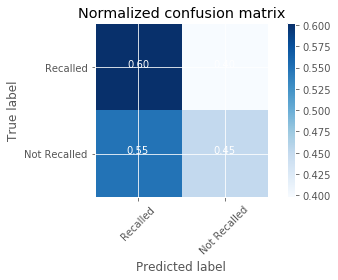

In [16]:
# session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(training_epochs + 1):
        sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
        loss, _, acc = sess.run([cost, optimizer, accuracy], feed_dict={
                                 X: X_train, Y: y_train})
        cost_history = np.append(cost_history, acc)
        if step % 100 == 0:
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))
            
    # Test model and check accuracy
    acc_pred = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    pred = sess.run(predicted, feed_dict={X: X_test, Y: y_test})
    print('Test Accuracy:', acc_pred)
    cnf_matrix = confusion_matrix(y_test, pred)
    np.set_printoptions(precision=2)
    class_names = ['Recalled', 'Not Recalled']
    plt.figure()
    plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')
    

Step:     0	Loss: 0.641	Acc: 70.84%
Step:   100	Loss: 0.498	Acc: 80.00%
Step:   200	Loss: 0.498	Acc: 80.00%
Step:   300	Loss: 0.498	Acc: 80.00%
Step:   400	Loss: 0.498	Acc: 80.00%
Step:   500	Loss: 0.498	Acc: 80.00%
Step:   600	Loss: 0.498	Acc: 80.00%
Step:   700	Loss: 0.498	Acc: 80.00%
Step:   800	Loss: 0.498	Acc: 80.00%
Step:   900	Loss: 0.498	Acc: 80.00%
Step:  1000	Loss: 0.498	Acc: 80.00%
Test Accuracy: 0.8943257
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


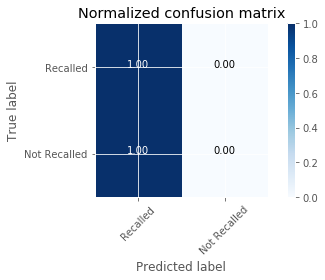

In [17]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 4)
# session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(training_epochs + 1):
        sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
        loss, _, acc = sess.run([cost, optimizer, accuracy], feed_dict={
                                 X: X_train, Y: y_train})
        cost_history = np.append(cost_history, acc)
        if step % 100 == 0:
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))
            
    # Test model and check accuracy
    acc_pred = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    pred = sess.run(predicted, feed_dict={X: X_test, Y: y_test})
    print('Test Accuracy:', acc_pred)
    cnf_matrix = confusion_matrix(y_test, pred)
    np.set_printoptions(precision=2)
    class_names = ['Recalled', 'Not Recalled']
    plt.figure()
    plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')
    

54.163889706908044
Normalized confusion matrix
[[0.55 0.45]
 [0.49 0.51]]


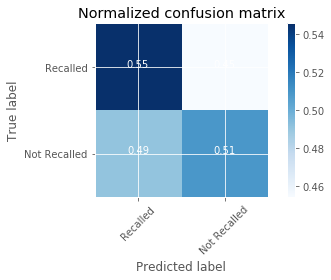

In [18]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1)
dt_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
print(accuracy_score(y_test,y_pred_gini)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_gini)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

88.97379066631534
Normalized confusion matrix
[[0.99 0.01]
 [0.99 0.01]]


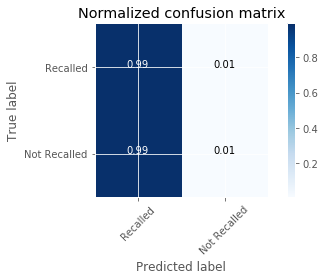

In [19]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1.5)
dt_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
print(accuracy_score(y_test,y_pred_gini)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_gini)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

89.2233295618345
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


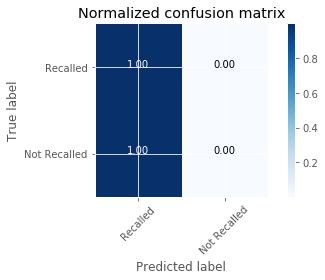

In [20]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1.8)
dt_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
print(accuracy_score(y_test,y_pred_gini)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_gini)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

89.43257025062384
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


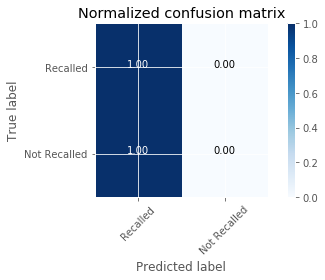

In [21]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = False)
dt_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
print(accuracy_score(y_test,y_pred_gini)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_gini)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

89.37677273361335
Normalized confusion matrix
[[9.99e-01 6.24e-04]
 [1.00e+00 0.00e+00]]


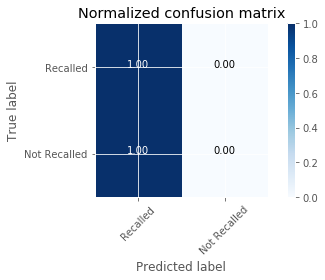

In [22]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1.5)
dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_entropy)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

89.43257025062384
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


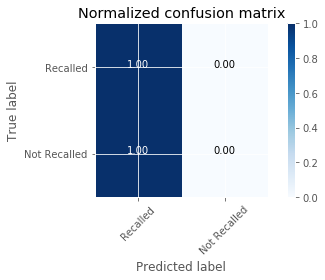

In [23]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1.8)
dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_entropy)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

89.42327066445543
Normalized confusion matrix
[[1.00e+00 1.39e-04]
 [1.00e+00 2.93e-04]]


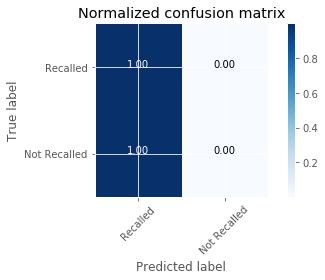

In [24]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 2)
dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_entropy)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')